<!-- In this project, K-Menas has been used to compress an image.
Idea is to first run KMeans on the colors of the pixels in the image and then 
later map each pixel onto its closest centroid
se the clusters of K-Means to
%  compress an image.  -->

# **Image Compression using KMeans**

**Background**

24-bit RGB images are images in which each pixel is represented by three 8-bit unsigned integers (thus, 24 bits total)
(ranging from 0 to 255) specifying the intensities of red, green, and blue that form the color for the pixel.


**Image Compression Approach:**

8-bit images can contain thousands of colors.
Here, the idea is to represent those images with just 16 colors
The number of colors used to represent the image is a tradeoff between the compressed image quality and its size

By making this reduction, it is possible to represent and store an image in an efficient way.
Because instead of storing all those thousands of colors, all that would be needed to be stored after compression is the
list of those selected 16 RGB colors and a list that maps each pixel in the image to the corresponding index of 16 selected colors
Note that only 4 bits are necessary to represent 16 possibilities

**How are those 16 colors chosen?**

KMeans algorithm is used to select 16 colors that will be used to represent the compressed image. 
Each pixel in the original image is treated as a data sample and then using K-Means to find the 16 colors that
best group (cluster) the pixels in the 3- dimensional RGB space.
Once the cluster centroids have been found, then those centroids (16 colors) are used to replace the pixels in the original image

In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys

In [63]:
def euclidean_distance(sample, centroids):

    return np.sqrt(np.sum((sample - centroids)**2, axis=1))

In [64]:
def initCentroids(X, K):

    randidx = np.random.randint(0, X.shape[0], K)
    
    centroids = X[randidx,:]

    return centroids

In [65]:
def assignClusters(X, centroids): 

    K = centroids.shape[0]
    m = X.shape[0]

    C = np.zeros((m,1))
    
    for i in range(m):
        distances = euclidean_distance(X[i,:], centroids)
        C[i] = np.argmin(distances)

    return C

In [66]:
def recenterCentroids(X, C, K):
    
    m,n = X.shape
    
    df = pd.DataFrame(X)
    df.insert(n,"cluster",C)
    
    centroids = df.groupby(by='cluster').mean().values
    
    return centroids

In [67]:
def KMeans(X, K):

    centroids = initCentroids(X, K)
    
    different = True
    i = 0
    centroids_history = []

    while different:
        
        centroids_history.append(centroids)
        
        i+=1

        C = assignClusters(X, centroids)

        centroids = recenterCentroids(X, C, K)
    
        if np.array_equal(centroids_history[-1], centroids) :
            different=False


    print('\nTraining Complete after {} iterations'.format(i))
    
    return centroids

In [68]:
def predict(X_test, centroids):
    
    C = assignClusters(X_test, centroids)
    
    return C

Compress Image

In [69]:
filename = "sample_image.jpg"

In [70]:
img = cv2.imread(filename, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [71]:
img = img/255

In [72]:
img.shape

(260, 480, 3)

In [73]:
# Image is reshaped into an m x 3 matrix, where m is the total pixels in the image
# Each row represents 1 pixel

X = np.reshape(img, (img.shape[0] * img.shape[1], 3));

In [74]:
X.shape

(124800, 3)

In [75]:
K = 16

centroids = KMeans(X, K)


Training Complete after 187 iterations


Mapping each pixel of the image to the selected 16 colors

In [76]:
C = predict(X, centroids)

Compressed image is now represented in terms of indices clusters in C and the cluster centroids (i.e. 16 colors)

In [77]:
# Image is recovered from the indices by mapping each pixel to the corresponding cluster centroid

X_recovered = centroids[C.astype(int).tolist(),:]

In [78]:
# Reshape the recovered image into proper dimensions

X_recovered = np.reshape(X_recovered, (img.shape[0], img.shape[1], 3))

Displaying the Original Image and the Compressed Image side by side

Text(0.5, 1.0, 'Compressed Image')

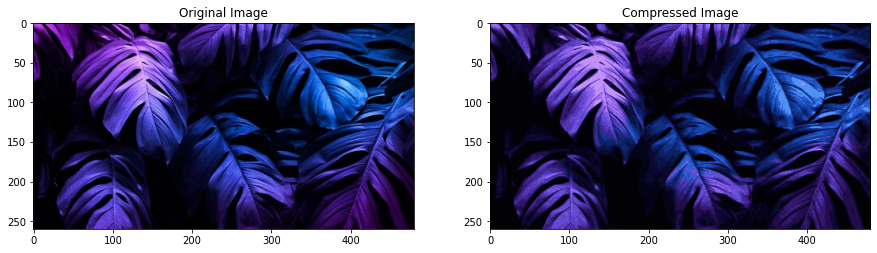

In [86]:
fig, axs = plt.subplots(1,2, squeeze=False, figsize=(15, 15))
axs[0,0].imshow(img)
axs[0,0].set_title("Original Image")
axs[0,1].imshow(X_recovered)
axs[0,1].set_title("Compressed Image")